In [2]:
import pandas as pd

df_symbols= pd.read_csv("C:/Users/Diwa arvind/Downloads/Stock-market-guvi-project/Sector_data - Sheet1.csv")
df_symbols['Actual Symbol'] = df_symbols['Symbol'].str.split(": ").str[-1]
df_symbols

COMPANY           sector                          Symbol  \
0     ADANI ENTERPRISES    MISCELLANEOUS   ADANI ENTERPRISES: ADANIGREEN   
1     ADANI PORTS & SEZ    MISCELLANEOUS   ADANI PORTS & SEZ: ADANIPORTS   
2      APOLLO HOSPITALS    MISCELLANEOUS    APOLLO HOSPITALS: APOLLOHOSP   
3          ASIAN PAINTS           PAINTS        ASIAN PAINTS: ASIANPAINT   
4             AXIS BANK          BANKING             AXIS BANK: AXISBANK   
5            BAJAJ AUTO      AUTOMOBILES          BAJAJ AUTO: BAJAJ-AUTO   
6         BAJAJ FINANCE          FINANCE       BAJAJ FINANCE: BAJFINANCE   
7         BAJAJ FINSERV          FINANCE       BAJAJ FINSERV: BAJAJFINSV   
8    BHARAT ELECTRONICS          DEFENCE         BHARAT ELECTRONICS: BEL   
9         BHARTI AIRTEL          TELECOM           BHARTI AIRTEL: AIRTEL   
10                 BPCL           ENERGY                      BPCL: BPCL   
11                CIPLA  PHARMACEUTICALS                    CIPLA: CIPLA   
12           COAL INDIA           MINING           COAL INDIA: COALINDIA   
13       DR. REDDYS LAB  PHARMACEUTICALS         DR. REDDYS LAB: DRREDDY   
14        EICHER MOTORS      AUTOMOBILES        EICHER MOTORS: EICHERMOT   
15               GRASIM         TEXTILES                  GRASIM: GRASIM   
16     HCL TECHNOLOGIES         SOFTWARE       HCL TECHNOLOGIES: HCLTECH   
17            HDFC BANK          BANKING             HDFC BANK: HDFCBANK   
18  HDFC LIFE INSURANCE        INSURANCE   HDFC LIFE INSURANCE: HDFCLIFE   
19        HERO MOTOCORP      AUTOMOBILES       HERO MOTOCORP: HEROMOTOCO   
20             HINDALCO        ALUMINIUM              HINDALCO: HINDALCO   
21   HINDUSTAN UNILEVER             FMCG  HINDUSTAN UNILEVER: HINDUNILVR   
22           ICICI BANK          BANKING           ICICI BANK: ICICIBANK   
23        INDUSIND BANK          BANKING       INDUSIND BANK: INDUSINDBK   
24              INFOSYS         SOFTWARE                   INFOSYS: INFY   
25                  IOC           ENERGY                        IOC: IOC   
26                  ITC   FOOD & TOBACCO                        ITC: ITC   
27            JSW STEEL            STEEL             JSW STEEL: JSWSTEEL   
28  KOTAK MAHINDRA BANK          BANKING  KOTAK MAHINDRA BANK: KOTAKBANK   
29                  L&T      ENGINEERING                         L&T: LT   
30                  M&M      AUTOMOBILES                        M&M: M&M   
31        MARUTI SUZUKI      AUTOMOBILES           MARUTI SUZUKI: MARUTI   
32               NESTLE   FOOD & TOBACCO               NESTLE: NESTLEIND   
33                 NTPC            POWER                      NTPC: NTPC   
34                 ONGC           ENERGY                      ONGC: ONGC   
35           POWER GRID            POWER           POWER GRID: POWERGRID   
36        RELIANCE IND.           ENERGY         RELIANCE IND.: RELIANCE   
37                  SBI          BANKING                       SBI: SBIN   
38   SBI LIFE INSURANCE        INSURANCE     SBI LIFE INSURANCE: SBILIFE   
39      SHRIRAM FINANCE          FINANCE     SHRIRAM FINANCE: SHRIRAMFIN   
40           SUN PHARMA  PHARMACEUTICALS           SUN PHARMA: SUNPHARMA   
41        TATA CONSUMER             FMCG     TATA CONSUMER: TATACONSUMER   
42          TATA MOTORS      AUTOMOBILES         TATA MOTORS: TATAMOTORS   
43           TATA STEEL            STEEL           TATA STEEL: TATASTEEL   
44                  TCS         SOFTWARE                        TCS: TCS   
45        TECH MAHINDRA         SOFTWARE            TECH MAHINDRA: TECHM   
46                TITAN        RETAILING                    TITAN: TITAN   
47                TRENT        RETAILING                    TRENT: TRENT   
48     ULTRATECH CEMENT           CEMENT    ULTRATECH CEMENT: ULTRACEMCO   
49                WIPRO         SOFTWARE                    WIPRO: WIPRO   

   Actual Symbol  
0     ADANIGREEN  
1     ADANIPORTS  
2     APOLLOHOSP  
3     ASIANPAINT  
4       AXISBANK  
5     BAJAJ-AUTO  
6     

In [1]:
df_symbols.shape


NameError: name 'df_symbols' is not defined

In [ ]:
df_symbols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   COMPANY  50 non-null     object
 1   sector   50 non-null     object
 2   Symbol   50 non-null     object
dtypes: object(3)
memory usage: 1.3+ KB


In [ ]:
df_symbols.describe()

COMPANY   sector                         Symbol
count                  50       50                             50
unique                 50       21                             50
top     ADANI ENTERPRISES  BANKING  ADANI ENTERPRISES: ADANIGREEN
freq                    1        6                              1

In [3]:
symbols = df_symbols['Symbol'].to_list()
symbols

only_symbol = [symbol.split(':')[1].strip() for symbol in symbols if ':' in symbol]
print(len(only_symbol))


50


In [4]:
from pathlib import Path
import yaml

symbol_data = {symbol:[] for symbol in only_symbol}

input_folder = "C:/Users/Diwa arvind/Downloads/Stock-market-guvi-project/data"

company_name = set()


for months in sorted(Path(input_folder).iterdir()):
    # month =  market guvi project/data/2023-10
    if months.is_dir():
        for dates in sorted(months.iterdir()):
            # dates =  market guvi project/data/2023-10/2023-10-03_05-30-00.yaml
            with open(dates,'r') as file:
                try:
                    data = yaml.safe_load(file)
                    for symbol in data:
                        print(symbol)
                        ticker = symbol['Ticker']
                        if ticker in only_symbol:
                            entry = symbol
                            # entry.pop('Ticker',None)
                            symbol_data[ticker].append(entry)        
                except yaml.YAMLError as e:
                    print(e)
print(len(company_name))
                        


{'Ticker': 'SBIN', 'close': 602.95, 'date': '2023-10-03 05:30:00', 'high': 604.9, 'low': 589.6, 'month': '2023-10', 'open': 596.6, 'volume': 15322196}
{'Ticker': 'BAJFINANCE', 'close': 7967.6, 'date': '2023-10-03 05:30:00', 'high': 7975.5, 'low': 7755.0, 'month': '2023-10', 'open': 7780.8, 'volume': 944555}
{'Ticker': 'TITAN', 'close': 3196.25, 'date': '2023-10-03 05:30:00', 'high': 3212.5, 'low': 3114.4, 'month': '2023-10', 'open': 3148.8, 'volume': 1007308}
{'Ticker': 'ITC', 'close': 439.75, 'date': '2023-10-03 05:30:00', 'high': 442.9, 'low': 439.25, 'month': '2023-10', 'open': 441.0, 'volume': 7481883}
{'Ticker': 'TCS', 'close': 3513.85, 'date': '2023-10-03 05:30:00', 'high': 3534.2, 'low': 3480.1, 'month': '2023-10', 'open': 3534.2, 'volume': 1948148}
{'Ticker': 'LT', 'close': 3073.25, 'date': '2023-10-03 05:30:00', 'high': 3077.45, 'low': 2995.1, 'month': '2023-10', 'open': 3040.5, 'volume': 3254492}
{'Ticker': 'TATACONSUM', 'close': 861.2, 'date': '2023-10-03 05:30:00', 'high': 

In [36]:
symbol_data

{'ADANIGREEN': [],
 'ADANIPORTS': [{'close': 831.4,
   'date': '2023-10-03 05:30:00',
   'high': 836.75,
   'low': 824.25,
   'month': '2023-10',
   'open': 826.0,
   'volume': 2453090},
  {'close': 824.6,
   'date': '2023-10-04 05:30:00',
   'high': 845.45,
   'low': 819.35,
   'month': '2023-10',
   'open': 830.95,
   'volume': 4096647},
  {'close': 825.2,
   'date': '2023-10-05 05:30:00',
   'high': 832.0,
   'low': 820.25,
   'month': '2023-10',
   'open': 830.85,
   'volume': 2083505},
  {'close': 830.75,
   'date': '2023-10-06 05:30:00',
   'high': 836.5,
   'low': 826.4,
   'month': '2023-10',
   'open': 830.0,
   'volume': 1877058},
  {'close': 790.05,
   'date': '2023-10-09 05:30:00',
   'high': 818.8,
   'low': 785.0,
   'month': '2023-10',
   'open': 815.0,
   'volume': 5994282},
  {'close': 819.5,
   'date': '2023-10-10 05:30:00',
   'high': 823.7,
   'low': 800.55,
   'month': '2023-10',
   'open': 800.55,
   'volume': 7591327},
  {'close': 814.85,
   'date': '2023-10-11 0

In [6]:
# convert to csv file

import os

output_folder = "C:/Users/Diwa arvind/Downloads/Stock-market-guvi-project/csv"

for symbol,entries in symbol_data.items():
    if entries:
        df_data = pd.DataFrame(entries)
        output_file = os.path.join(output_folder,f"{symbol}.csv")
        df_data.to_csv(output_file,index=False)




NameError: name 'symbol_data' is not defined

In [41]:
df_data

close                 date    high     low    month    open   volume
0    405.45  2023-10-03 05:30:00  408.10  403.60  2023-10  406.45  2864052
1    404.90  2023-10-04 05:30:00  405.45  400.65  2023-10  402.70  3452935
2    406.80  2023-10-05 05:30:00  410.40  405.00  2023-10  407.95  4062652
3    407.85  2023-10-06 05:30:00  409.80  406.95  2023-10  408.00  3182502
4    405.60  2023-10-09 05:30:00  411.00  403.40  2023-10  404.20  3015225
..      ...                  ...     ...     ...      ...     ...      ...
279  566.70  2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760
280  552.85  2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882
281  562.00  2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889
282  557.15  2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304
283  571.65  2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616

[284 rows x 7 columns]

In [5]:
only_symbol_set = set(only_symbol)

missing = only_symbol_set - company_name

missing

{'ADANIGREEN',
 'ADANIPORTS',
 'AIRTEL',
 'APOLLOHOSP',
 'ASIANPAINT',
 'AXISBANK',
 'BAJAJ-AUTO',
 'BAJAJFINSV',
 'BAJFINANCE',
 'BEL',
 'BPCL',
 'CIPLA',
 'COALINDIA',
 'DRREDDY',
 'EICHERMOT',
 'GRASIM',
 'HCLTECH',
 'HDFCBANK',
 'HDFCLIFE',
 'HEROMOTOCO',
 'HINDALCO',
 'HINDUNILVR',
 'ICICIBANK',
 'INDUSINDBK',
 'INFY',
 'IOC',
 'ITC',
 'JSWSTEEL',
 'KOTAKBANK',
 'LT',
 'M&M',
 'MARUTI',
 'NESTLEIND',
 'NTPC',
 'ONGC',
 'POWERGRID',
 'RELIANCE',
 'SBILIFE',
 'SBIN',
 'SHRIRAMFIN',
 'SUNPHARMA',
 'TATACONSUMER',
 'TATAMOTORS',
 'TATASTEEL',
 'TCS',
 'TECHM',
 'TITAN',
 'TRENT',
 'ULTRACEMCO',
 'WIPRO'}

In [6]:
from pathlib import Path
import yaml

symbol_data = {symbol:[] for symbol in symbols}

input_folder = "C:/Users/Diwa arvind/Downloads/Stock-market-guvi-project/data"

company_name = set()


for months in sorted(Path(input_folder).iterdir()):
    if months.is_dir():
        for dates in sorted(months.iterdir()):
            with open(dates,'r') as file:
                try:
                    data = yaml.safe_load(file)
                    for company in data:
                        if company['Ticker'] in only_symbol:
                            company_name.add(company['Ticker'])      
                except yaml.YAMLError as e:
                    print(e)
print(len(company_name))
                        


46


In [7]:
#combining data for analysis

from pathlib import Path

csv_folder = "C:/Users/Diwa arvind/Downloads/Stock-market-guvi-project/csv"

all_data = []

for csv_file in Path(csv_folder).glob("*.csv"):
    df_csvdata = pd.read_csv(csv_file)
    df_csvdata["symbol"] = csv_file.stem

    df_csvdata = pd.merge(
        df_csvdata,
        df_symbols,
        left_on="symbol",
        right_on="Actual Symbol",
        
    )
    df_csvdata = df_csvdata.rename(columns={"COMPANY":"company"})
    df_csvdata = df_csvdata.drop(columns=["Actual Symbol","Symbol"])


    all_data.append(df_csvdata)

In [9]:
all_data

[       close                 date     high      low    month     open  \
 0     831.40  2023-10-03 05:30:00   836.75   824.25  2023-10   826.00   
 1     824.60  2023-10-04 05:30:00   845.45   819.35  2023-10   830.95   
 2     825.20  2023-10-05 05:30:00   832.00   820.25  2023-10   830.85   
 3     830.75  2023-10-06 05:30:00   836.50   826.40  2023-10   830.00   
 4     790.05  2023-10-09 05:30:00   818.80   785.00  2023-10   815.00   
 ..       ...                  ...      ...      ...      ...      ...   
 279  1264.55  2024-11-14 05:30:00  1296.65  1260.65  2024-11  1289.95   
 280  1279.30  2024-11-18 05:30:00  1288.90  1261.30  2024-11  1264.00   
 281  1289.65  2024-11-19 05:30:00  1321.45  1282.00  2024-11  1285.00   
 282  1114.65  2024-11-21 05:30:00  1160.70   995.65  2024-11  1160.70   
 283  1136.75  2024-11-22 05:30:00  1155.90  1054.00  2024-11  1072.60   
 
        volume      symbol            company         sector  
 0     2453090  ADANIPORTS  ADANI PORTS & SEZ  

In [44]:
combined_df = pd.concat(all_data,ignore_index=True)
combined_df

close                 date    high     low    month    open   volume  \
0      831.40  2023-10-03 05:30:00  836.75  824.25  2023-10  826.00  2453090   
1      824.60  2023-10-04 05:30:00  845.45  819.35  2023-10  830.95  4096647   
2      825.20  2023-10-05 05:30:00  832.00  820.25  2023-10  830.85  2083505   
3      830.75  2023-10-06 05:30:00  836.50  826.40  2023-10  830.00  1877058   
4      790.05  2023-10-09 05:30:00  818.80  785.00  2023-10  815.00  5994282   
...       ...                  ...     ...     ...      ...     ...      ...   
13059  566.70  2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760   
13060  552.85  2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882   
13061  562.00  2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889   
13062  557.15  2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304   
13063  571.65  2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616   

           symbol            company         sector  
0      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS  
1      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS  
2      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS  
3      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS  
4      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS  
...           ...                ...            ...  
13059       WIPRO              WIPRO       SOFTWARE  
13060       WIPRO              WIPRO       SOFTWARE  
13061       WIPRO              WIPRO       SOFTWARE  
13062       WIPRO              WIPRO       SOFTWARE  
13063       WIPRO              WIPRO       SOFTWARE  

[13064 rows x 10 columns]

In [2]:
combined_df.isna().any()

NameError: name 'combined_df' is not defined

In [9]:
from sqlalchemy import create_engine

DB_TYPE = 'mysql+pymysql'
DB_HOST = 'localhost'      # Database host
DB_PORT = '3306'           # Database port
DB_USER = 'root'           # Database username
DB_PASS = 'Navabalan#16'   # Database password
DB_NAME = 'stock'          # Database name
TABLE_NAME = 'stock_data'

engine = create_engine(f'{DB_TYPE}://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Database connection established successfully!")

try:
    combined_df.to_sql(TABLE_NAME,engine,if_exists="replace",index=False)
    print("Table created")
except Exception as e:
    print(e)


Database connection established successfully!
Table created


In [45]:
# calculating yearly returns 

yearly_returns = combined_df.groupby("symbol",group_keys=False).apply(
    lambda x:(( x.loc[x['date']==x['date'].max(),'close'].values[0]-
               x.loc[x['date']==x['date'].min(),'close'].values[0]) / 
                x.loc[x['date']==x['date'].min(),'close'].values[0] * 100)

    ).reset_index(name = "yearly returns")


C:\Users\Diwa arvind\AppData\Local\Temp\ipykernel_20532\4132391125.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  yearly_returns = combined_df.groupby("symbol",group_keys=False).apply(


In [16]:
yearly_returns

symbol  yearly returns
0   ADANIPORTS       36.727207
1   APOLLOHOSP       35.478956
2   ASIANPAINT      -21.935046
3     AXISBANK        9.735363
4   BAJAJ-AUTO       89.011153
5   BAJAJFINSV        2.549566
6   BAJFINANCE      -16.110874
7          BEL      101.760057
8         BPCL       67.477150
9        CIPLA       25.676361
10   COALINDIA       41.846523
11     DRREDDY       11.178754
12   EICHERMOT       48.779614
13      GRASIM       35.781988
14     HCLTECH       53.257447
15    HDFCBANK       15.752130
16    HDFCLIFE        8.625996
17  HEROMOTOCO       58.976655
18    HINDALCO       35.868320
19  HINDUNILVR       -0.957916
20   ICICIBANK       35.919387
21  INDUSINDBK      -30.458409
22        INFY       32.653417
23         ITC        7.936327
24    JSWSTEEL       26.887374
25   KOTAKBANK        1.991836
26          LT       17.253722
27         M&M       95.976974
28      MARUTI        6.926712
29   NESTLEIND        0.707141
30        NTPC       51.513267
31        ONGC       33.044420
32   POWERGRID       68.854924
33    RELIANCE        9.172792
34     SBILIFE       14.909668
35        SBIN       35.342897
36  SHRIRAMFIN       48.289498
37   SUNPHARMA       57.282404
38  TATAMOTORS       27.488113
39   TATASTEEL       11.546875
40         TCS       20.796278
41       TECHM       43.681138
42       TITAN        3.518185
43       TRENT      223.092613
44  ULTRACEMCO       36.970945
45       WIPRO       40.991491

In [46]:
#top 10 gain and loss stock

top_10_green = yearly_returns.sort_values(by='yearly returns',ascending=False).head(10)
top_10_loss = yearly_returns.sort_values(by='yearly returns',ascending=True).head(10)


top_10_loss

symbol  yearly returns
21  INDUSINDBK      -30.458409
2   ASIANPAINT      -21.935046
6   BAJFINANCE      -16.110874
19  HINDUNILVR       -0.957916
29   NESTLEIND        0.707141
25   KOTAKBANK        1.991836
5   BAJAJFINSV        2.549566
42       TITAN        3.518185
28      MARUTI        6.926712
23         ITC        7.936327

In [47]:
# adding green and red stock

yearly_returns['classification'] = yearly_returns['yearly returns'].apply(
    lambda x: 'green' if x>0 else 'red' 
)

In [15]:
yearly_returns

symbol  yearly returns classification
0   ADANIPORTS       36.727207          green
1   APOLLOHOSP       35.478956          green
2   ASIANPAINT      -21.935046            red
3     AXISBANK        9.735363          green
4   BAJAJ-AUTO       89.011153          green
5   BAJAJFINSV        2.549566          green
6   BAJFINANCE      -16.110874            red
7          BEL      101.760057          green
8         BPCL       67.477150          green
9        CIPLA       25.676361          green
10   COALINDIA       41.846523          green
11     DRREDDY       11.178754          green
12   EICHERMOT       48.779614          green
13      GRASIM       35.781988          green
14     HCLTECH       53.257447          green
15    HDFCBANK       15.752130          green
16    HDFCLIFE        8.625996          green
17  HEROMOTOCO       58.976655          green
18    HINDALCO       35.868320          green
19  HINDUNILVR       -0.957916            red
20   ICICIBANK       35.919387          green
21  INDUSINDBK      -30.458409            red
22        INFY       32.653417          green
23         ITC        7.936327          green
24    JSWSTEEL       26.887374          green
25   KOTAKBANK        1.991836          green
26          LT       17.253722          green
27         M&M       95.976974          green
28      MARUTI        6.926712          green
29   NESTLEIND        0.707141          green
30        NTPC       51.513267          green
31        ONGC       33.044420          green
32   POWERGRID       68.854924          green
33    RELIANCE        9.172792          green
34     SBILIFE       14.909668          green
35        SBIN       35.342897          green
36  SHRIRAMFIN       48.289498          green
37   SUNPHARMA       57.282404          green
38  TATAMOTORS       27.488113          green
39   TATASTEEL       11.546875          green
40         TCS       20.796278          green
41       TECHM       43.681138          green
42       TITAN        3.518185          green
43       TRENT      223.092613          green
44  ULTRACEMCO       36.970945          green
45       WIPRO       40.991491          green

In [20]:
from sqlalchemy import create_engine

DB_TYPE = 'mysql+pymysql'  # Specify pymysql as the driver
DB_HOST = 'localhost'      # Database host
DB_PORT = '3306'           # Database port
DB_USER = 'root'           # Database username
DB_PASS = 'Navabalan#16'   # Database password
DB_NAME = 'stock'          # Database name
TABLE_NAME = 'yearly_returns'

engine = create_engine(f'{DB_TYPE}://{DB_USER}:{DB_PASS}@{DB_HOST}:{DB_PORT}/{DB_NAME}')
print("Database connection established successfully!")

try:
    yearly_returns.to_sql(TABLE_NAME,engine,if_exists="replace",index=False)
    print("Table created")
except Exception as e:
    print(e)


Database connection established successfully!
Table created


In [16]:
# market summary

maket_summary = {
    "green_stock" :  yearly_returns[yearly_returns['classification'] == 'green'].shape[0],
    "red_stock" :  yearly_returns[yearly_returns['classification'] == 'red'].shape[0],
    'average_price': combined_df['close'].mean(),
    'average_volume': combined_df['volume'].mean()
}


market_summary_df = pd.DataFrame([maket_summary])



market_summary_df.to_csv('market_summary.csv', index=False)

market_summary_df

green_stock  red_stock  average_price  average_volume
0           42          4    2432.513756    7.197211e+06

#1.Volatility Analysis

In [48]:
# daily returns 

combined_df['daily_returns'] = combined_df.groupby('symbol')['close'].pct_change()

In [49]:
combined_df

close                 date    high     low    month    open   volume  \
0      831.40  2023-10-03 05:30:00  836.75  824.25  2023-10  826.00  2453090   
1      824.60  2023-10-04 05:30:00  845.45  819.35  2023-10  830.95  4096647   
2      825.20  2023-10-05 05:30:00  832.00  820.25  2023-10  830.85  2083505   
3      830.75  2023-10-06 05:30:00  836.50  826.40  2023-10  830.00  1877058   
4      790.05  2023-10-09 05:30:00  818.80  785.00  2023-10  815.00  5994282   
...       ...                  ...     ...     ...      ...     ...      ...   
13059  566.70  2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760   
13060  552.85  2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882   
13061  562.00  2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889   
13062  557.15  2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304   
13063  571.65  2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616   

           symbol            company         sector  daily_returns  
0      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS            NaN  
1      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.008179  
2      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.000728  
3      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.006726  
4      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.048992  
...           ...                ...            ...            ...  
13059       WIPRO              WIPRO       SOFTWARE      -0.004042  
13060       WIPRO              WIPRO       SOFTWARE      -0.024440  
13061       WIPRO              WIPRO       SOFTWARE       0.016551  
13062       WIPRO              WIPRO       SOFTWARE      -0.008630  
13063       WIPRO              WIPRO       SOFTWARE       0.026025  

[13064 rows x 11 columns]

In [19]:
#volatility

volatility = combined_df.groupby('symbol')['daily_returns'].std().reset_index(name='volatility')
top_10_volatile_stock = volatility.sort_values(by='volatility',ascending=False).head(10)
top_10_volatile_stock

top_10_volatile_stock.to_csv('volatility.csv', index=False)

/tmp/ipykernel_35522/1622117868.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='symbol',y='volatility', data= top_10_volatile_stock,palette='viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

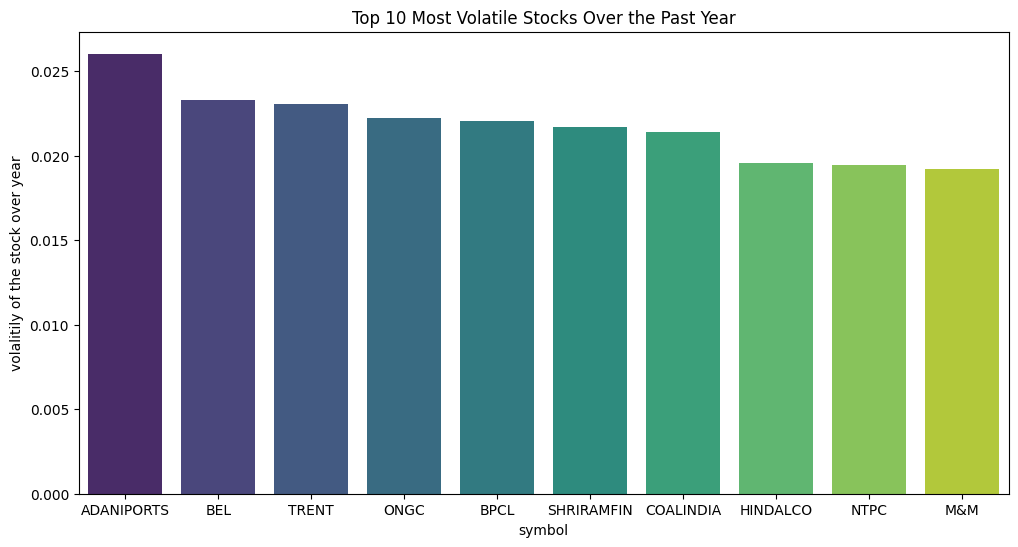

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='symbol',y='volatility', data= top_10_volatile_stock,palette='viridis')
plt.title("Top 10 Most Volatile Stocks Over the Past Year")
plt.xlabel('symbol')
plt.ylabel('volalitily of the stock over year')
plt.show


#2. Cumulative Return Over Time

In [50]:
combined_df['cumulative_return'] = (
    combined_df.groupby('symbol')['daily_returns']
    .apply(lambda x: (1 + x).cumprod())
    .reset_index(level=0, drop=True) 
    - 1
)

combined_df

close                 date    high     low    month    open   volume  \
0      831.40  2023-10-03 05:30:00  836.75  824.25  2023-10  826.00  2453090   
1      824.60  2023-10-04 05:30:00  845.45  819.35  2023-10  830.95  4096647   
2      825.20  2023-10-05 05:30:00  832.00  820.25  2023-10  830.85  2083505   
3      830.75  2023-10-06 05:30:00  836.50  826.40  2023-10  830.00  1877058   
4      790.05  2023-10-09 05:30:00  818.80  785.00  2023-10  815.00  5994282   
...       ...                  ...     ...     ...      ...     ...      ...   
13059  566.70  2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760   
13060  552.85  2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882   
13061  562.00  2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889   
13062  557.15  2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304   
13063  571.65  2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616   

           symbol            company         sector  daily_returns  \
0      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS            NaN   
1      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.008179   
2      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.000728   
3      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.006726   
4      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.048992   
...           ...                ...            ...            ...   
13059       WIPRO              WIPRO       SOFTWARE      -0.004042   
13060       WIPRO              WIPRO       SOFTWARE      -0.024440   
13061       WIPRO              WIPRO       SOFTWARE       0.016551   
13062       WIPRO              WIPRO       SOFTWARE      -0.008630   
13063       WIPRO              WIPRO       SOFTWARE       0.026025   

       cumulative_return  
0                    NaN  
1              -0.008179  
2              -0.007457  
3              -0.000782  
4              -0.049735  
...                  ...  
13059           0.397706  
13060           0.363547  
13061           0.386114  
13062           0.374152  
13063           0.409915  

[13064 rows x 12 columns]

In [51]:
final_cummulative_return = combined_df.groupby("symbol")['cumulative_return'].last().sort_values(ascending=False)
final_cummulative_return

symbol
TRENT         2.230926
BEL           1.017601
M&M           0.959770
BAJAJ-AUTO    0.890112
POWERGRID     0.688549
BPCL          0.674772
HEROMOTOCO    0.589767
SUNPHARMA     0.572824
HCLTECH       0.532574
NTPC          0.515133
EICHERMOT     0.487796
SHRIRAMFIN    0.482895
TECHM         0.436811
COALINDIA     0.418465
WIPRO         0.409915
ULTRACEMCO    0.369709
ADANIPORTS    0.367272
ICICIBANK     0.359194
HINDALCO      0.358683
GRASIM        0.357820
APOLLOHOSP    0.354790
SBIN          0.353429
ONGC          0.330444
INFY          0.326534
TATAMOTORS    0.274881
JSWSTEEL      0.268874
CIPLA         0.256764
TCS           0.207963
LT            0.172537
HDFCBANK      0.157521
SBILIFE       0.149097
TATASTEEL     0.115469
DRREDDY       0.111788
AXISBANK      0.097354
RELIANCE      0.091728
HDFCLIFE      0.086260
ITC           0.079363
MARUTI        0.069267
TITAN         0.035182
BAJAJFINSV    0.025496
KOTAKBANK     0.019918
NESTLEIND     0.007071
HINDUNILVR   -0.009579
BAJF

In [52]:
top_5_stock = final_cummulative_return.head(5).index
top_5_data = combined_df[combined_df['symbol'].isin(top_5_stock)]
top_5_data.to_csv('top_5_data.csv',index=False)



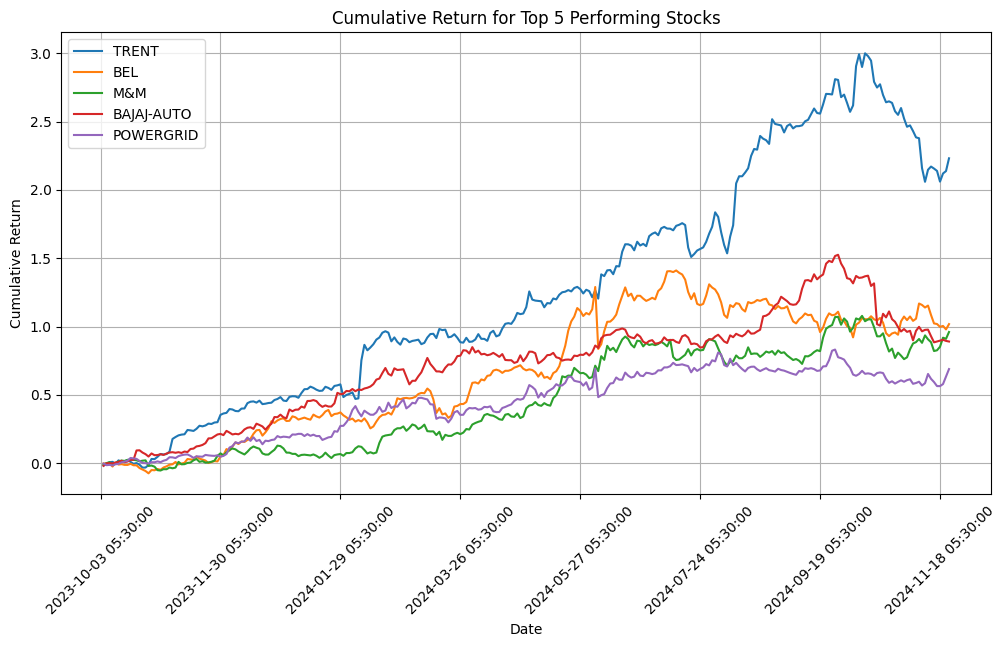

In [ ]:
#line chart

plt.figure(figsize=(12,6))
for symbol in top_5_stock:
    stock_data = top_5_data[top_5_data['symbol']==symbol]
    plt.plot(stock_data['date'],stock_data['cumulative_return'],label=symbol)

plt.title('Cumulative Return for Top 5 Performing Stocks')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(nbins=10))  # Limit the number of ticks
plt.grid(True)
plt.show()

# 3. Sector-wise Performance


In [35]:
merged_data = pd.merge(yearly_returns,df_symbols[['Actual Symbol','sector']],left_on='symbol',right_on='Actual Symbol',how='left')
merged_data

symbol  yearly returns classification Actual Symbol           sector
0   ADANIPORTS       36.727207          green    ADANIPORTS    MISCELLANEOUS
1   APOLLOHOSP       35.478956          green    APOLLOHOSP    MISCELLANEOUS
2   ASIANPAINT      -21.935046            red    ASIANPAINT           PAINTS
3     AXISBANK        9.735363          green      AXISBANK          BANKING
4   BAJAJ-AUTO       89.011153          green    BAJAJ-AUTO      AUTOMOBILES
5   BAJAJFINSV        2.549566          green    BAJAJFINSV          FINANCE
6   BAJFINANCE      -16.110874            red    BAJFINANCE          FINANCE
7          BEL      101.760057          green           BEL          DEFENCE
8         BPCL       67.477150          green          BPCL           ENERGY
9        CIPLA       25.676361          green         CIPLA  PHARMACEUTICALS
10   COALINDIA       41.846523          green     COALINDIA           MINING
11     DRREDDY       11.178754          green       DRREDDY  PHARMACEUTICALS
12   EICHERMOT       48.779614          green     EICHERMOT      AUTOMOBILES
13      GRASIM       35.781988          green        GRASIM         TEXTILES
14     HCLTECH       53.257447          green       HCLTECH         SOFTWARE
15    HDFCBANK       15.752130          green      HDFCBANK          BANKING
16    HDFCLIFE        8.625996          green      HDFCLIFE        INSURANCE
17  HEROMOTOCO       58.976655          green    HEROMOTOCO      AUTOMOBILES
18    HINDALCO       35.868320          green      HINDALCO        ALUMINIUM
19  HINDUNILVR       -0.957916            red    HINDUNILVR             FMCG
20   ICICIBANK       35.919387          green     ICICIBANK          BANKING
21  INDUSINDBK      -30.458409            red    INDUSINDBK          BANKING
22        INFY       32.653417          green          INFY         SOFTWARE
23         ITC        7.936327          green           ITC   FOOD & TOBACCO
24    JSWSTEEL       26.887374          green      JSWSTEEL            STEEL
25   KOTAKBANK        1.991836          green     KOTAKBANK          BANKING
26          LT       17.253722          green            LT      ENGINEERING
27         M&M       95.976974          green           M&M      AUTOMOBILES
28      MARUTI        6.926712          green        MARUTI      AUTOMOBILES
29   NESTLEIND        0.707141          green     NESTLEIND   FOOD & TOBACCO
30        NTPC       51.513267          green          NTPC            POWER
31        ONGC       33.044420          green          ONGC           ENERGY
32   POWERGRID       68.854924          green     POWERGRID            POWER
33    RELIANCE        9.172792          green      RELIANCE           ENERGY
34     SBILIFE       14.909668          green       SBILIFE        INSURANCE
35        SBIN       35.342897          green          SBIN          BANKING
36  SHRIRAMFIN       48.289498          green    SHRIRAMFIN          FINANCE
37   SUNPHARMA       57.282404          green     SUNPHARMA  PHARMACEUTICALS
38  TATAMOTORS       27.488113          green    TATAMOTORS      AUTOMOBILES
39   TATASTEEL       11.546875          green     TATASTEEL            STEEL
40         TCS       20.796278          green           TCS         SOFTWARE
41       TECHM       43.681138          green         TECHM         SOFTWARE
42       TITAN        3.518185          green         TITAN        RETAILING
43       TRENT      223.092613          green         TRENT        RETAILING
44  ULTRACEMCO       36.970945          green    ULTRACEMCO           CEMENT
45       WIPRO       40.991491          green         WIPRO         SOFTWARE

In [36]:
sector_performance = merged_data.groupby('sector').agg({
    'yearly returns' : 'mean',
    'classification': lambda x:(x=='green').sum(),
    'symbol':'count'
}).reset_index()

sector_performance.columns = ['sector','avg_yearly_returns','green stocks','total stocks']

sector_performance['green percentage'] = (sector_performance['green stocks']/sector_performance['total stocks'])*100

sector_performance = sector_performance.sort_values(by='avg_yearly_returns',ascending=False)

sector_performance

sector  avg_yearly_returns  green stocks  total stocks  \
16        RETAILING          113.305399             2             2   
4           DEFENCE          101.760057             1             1   
15            POWER           60.184095             2             2   
1       AUTOMOBILES           54.526537             6             6   
11           MINING           41.846523             1             1   
17         SOFTWARE           38.275954             5             5   
3            CEMENT           36.970945             1             1   
5            ENERGY           36.564788             3             3   
12    MISCELLANEOUS           36.103081             2             2   
0         ALUMINIUM           35.868320             1             1   
19         TEXTILES           35.781988             1             1   
14  PHARMACEUTICALS           31.379173             3             3   
18            STEEL           19.217125             2             2   
6       ENGINEERING           17.253722             1             1   
10        INSURANCE           11.767832             2             2   
7           FINANCE           11.576063             2             3   
2           BANKING           11.380534             5             6   
9    FOOD & TOBACCO            4.321734             2             2   
8              FMCG           -0.957916             0             1   
13           PAINTS          -21.935046             0             1   

    green percentage  
16        100.000000  
4         100.000000  
15        100.000000  
1         100.000000  
11        100.000000  
17        100.000000  
3         100.000000  
5         100.000000  
12        100.000000  
0         100.000000  
19        100.000000  
14        100.000000  
18        100.000000  
6         100.000000  
10        100.000000  
7          66.666667  
2          83.333333  
9         100.000000  
8           0.000000  
13          0.000000

In [37]:
sector_performance.to_csv('sector_performace.csv',index=False)

C:\Users\Diwa arvind\AppData\Local\Temp\ipykernel_20532\3812607291.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sector',y='avg_yearly_returns',data=sector_performance,palette='viridis')


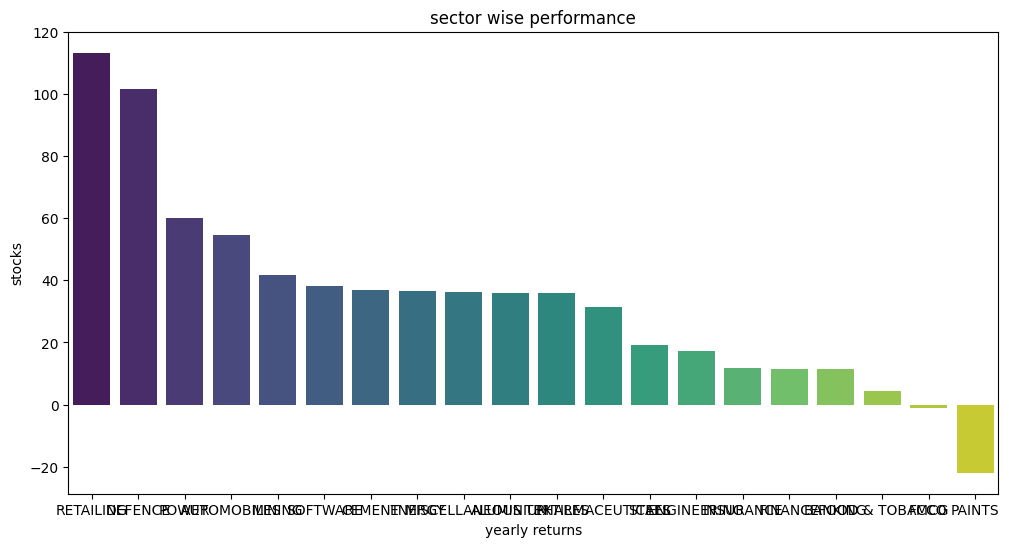

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.barplot(x='sector',y='avg_yearly_returns',data=sector_performance,palette='viridis')
plt.title('sector wise performance')
plt.xlabel('yearly returns')
plt.ylabel('stocks')
plt.show()

In [53]:
pivotdf = combined_df.pivot(index='date',columns='symbol',values='close')
pivotdf

symbol               ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  BAJAJ-AUTO  \
date                                                                            
2023-10-03 05:30:00      831.40     5118.95     3166.85   1041.05     5016.45   
2023-10-04 05:30:00      824.60     5047.40     3169.90    995.55     4918.60   
2023-10-05 05:30:00      825.20     5047.05     3206.25   1003.25     5011.05   
2023-10-06 05:30:00      830.75     5060.25     3195.75   1000.95     5014.60   
2023-10-09 05:30:00      790.05     5047.30     3152.80    996.25     5007.30   
...                         ...         ...         ...       ...         ...   
2024-11-14 05:30:00     1264.55     6860.65     2483.15   1140.70     9482.95   
2024-11-18 05:30:00     1279.30     6741.90     2483.70   1126.20     9516.50   
2024-11-19 05:30:00     1289.65     6686.90     2483.70   1133.95     9545.70   
2024-11-21 05:30:00     1114.65     6742.50     2428.15   1139.15     9505.00   
2024-11-22 05:30:00     1136.75     6935.10     2472.20   1142.40     9481.65   

symbol               BAJAJFINSV  BAJFINANCE     BEL    BPCL    CIPLA  ...  \
date                                                                  ...   
2023-10-03 05:30:00     1561.05     7967.60  139.20  170.68  1182.80  ...   
2023-10-04 05:30:00     1532.55     7854.05  138.85  170.68  1167.05  ...   
2023-10-05 05:30:00     1542.55     7850.90  138.95  172.23  1161.10  ...   
2023-10-06 05:30:00     1634.65     8168.55  139.00  173.60  1163.00  ...   
2023-10-09 05:30:00     1621.55     8027.70  135.75  170.00  1159.50  ...   
...                         ...         ...     ...     ...      ...  ...   
2024-11-14 05:30:00     1639.80     6549.15  280.95  298.20  1499.75  ...   
2024-11-18 05:30:00     1616.00     6567.95  278.05  289.20  1465.25  ...   
2024-11-19 05:30:00     1596.35     6595.30  279.00  287.50  1471.55  ...   
2024-11-21 05:30:00     1569.25     6465.65  275.45  282.40  1465.50  ...   
2024-11-22 05:30:00     1600.85     6683.95  280.85  285.85  1486.50  ...   

symbol               SHRIRAMFIN  SUNPHARMA  TATAMOTORS  TATASTEEL      TCS  \
date                                                                         
2023-10-03 05:30:00     1921.95    1141.45      620.45     128.00  3513.85   
2023-10-04 05:30:00     1850.60    1123.80      613.60     125.30  3537.75   
2023-10-05 05:30:00     1837.50    1119.10      619.60     125.25  3589.35   
2023-10-06 05:30:00     1848.85    1127.30      622.45     125.90  3621.40   
2023-10-09 05:30:00     1820.90    1123.05      617.35     123.85  3638.35   
...                         ...        ...         ...        ...      ...   
2024-11-14 05:30:00     2822.60    1768.20      774.30     137.98  4145.90   
2024-11-18 05:30:00     2848.15    1747.75      771.90     141.21  4019.50   
2024-11-19 05:30:00     2824.75    1777.25      783.20     139.46  4039.55   
2024-11-21 05:30:00     2802.20    1780.00      773.85     140.22  4072.85   
2024-11-22 05:30:00     2850.05    1795.30      791.00     142.78  4244.60   

symbol                 TECHM    TITAN    TRENT  ULTRACEMCO   WIPRO  
date                                                                
2023-10-03 05:30:00  1216.20  3196.25  2059.10     8304.90  405.45  
2023-10-04 05:30:00  1205.00  3166.65  2022.30     8120.85  404.90  
2023-10-05 05:30:00  1205.60  3216.50  2047.60     8177.45  406.80  
2023-10-06 05:30:00  1216.90  3309.75  2072.10     8195.45  407.85  
2023-10-09 05:30:00  1212.65  3267.50  2079.05     8110.10  405.60  
...                      ...      ...      ...         ...     ...  
2024-11-14 05:30:00  1687.50  3183.70  6463.00    10728.50  566.70  
2024-11-18 05:30:00  1660.80  3172.30  6301.65    10630.90  552.85  
2024-11-19 05:30:00  1699.65  3224.70  6423.85    10769.55  562.00  
2024-11-21 05:30:00  1702.25  3178.45  6460.45    10954.85  557.15  
2024-11-22 05:30:00  1747.45  3308.70  6652.80    11375.30  571.65  

[284 rows x 46 columns]

In [54]:
# correlation 

correlation = pivotdf.corr()

correlation

symbol      ADANIPORTS  APOLLOHOSP  ASIANPAINT  AXISBANK  BAJAJ-AUTO  \
symbol                                                                 
ADANIPORTS    1.000000    0.815085   -0.246520  0.770207    0.887718   
APOLLOHOSP    0.815085    1.000000   -0.157872  0.607392    0.893753   
ASIANPAINT   -0.246520   -0.157872    1.000000  0.000971   -0.162563   
AXISBANK      0.770207    0.607392    0.000971  1.000000    0.742850   
BAJAJ-AUTO    0.887718    0.893753   -0.162563  0.742850    1.000000   
BAJAJFINSV    0.215085    0.509150    0.463444  0.334558    0.516365   
BAJFINANCE   -0.486128   -0.410892    0.609427 -0.155250   -0.322937   
BEL           0.900377    0.752139   -0.246263  0.863011    0.872667   
BPCL          0.941068    0.872684   -0.252440  0.674180    0.924263   
CIPLA         0.893970    0.895506   -0.201212  0.695300    0.951692   
COALINDIA     0.958840    0.800067   -0.200126  0.737842    0.896068   
DRREDDY       0.833252    0.857218   -0.066455  0.643701    0.834474   
EICHERMOT     0.809143    0.720422   -0.166484  0.839801    0.847652   
GRASIM        0.859429    0.807365   -0.128088  0.848108    0.902320   
HCLTECH       0.628889    0.912645   -0.084115  0.453107    0.751970   
HDFCBANK      0.316020    0.429288    0.298623  0.634658    0.453886   
HDFCLIFE      0.169770    0.483689    0.383915  0.258353    0.383916   
HEROMOTOCO    0.927167    0.813080   -0.134136  0.836953    0.931282   
HINDALCO      0.804026    0.721501   -0.083139  0.834664    0.868757   
HINDUNILVR    0.238913    0.388173    0.609737  0.474330    0.424007   
ICICIBANK     0.831921    0.853108   -0.211488  0.819641    0.920296   
INDUSINDBK   -0.195635   -0.447425    0.441991 -0.205324   -0.348109   
INFY          0.604507    0.843184    0.106584  0.540266    0.726279   
ITC           0.334372    0.530459    0.460887  0.464064    0.520786   
JSWSTEEL      0.767751    0.800106   -0.060194  0.811117    0.883737   
KOTAKBANK     0.100027    0.234734    0.575571  0.275503    0.170600   
LT            0.854856    0.712629   -0.140669  0.653209    0.746205   
M&M           0.802967    0.758610   -0.212399  0.822275    0.893160   
MARUTI        0.783546    0.563828   -0.299957  0.596535    0.793630   
NESTLEIND     0.357643    0.167141    0.332442  0.326966    0.296111   
NTPC          0.927944    0.901043   -0.147944  0.769117    0.956263   
ONGC          0.932968    0.795543   -0.239636  0.663991    0.850437   
POWERGRID     0.942616    0.830934   -0.266174  0.820524    0.931858   
RELIANCE      0.899794    0.645386   -0.221456  0.649850    0.728359   
SBILIFE       0.681709    0.817298    0.206655  0.600855    0.821833   
SBIN          0.925261    0.739885   -0.426790  0.772675    0.851753   
SHRIRAMFIN    0.793997    0.900182   -0.030136  0.740759    0.937393   
SUNPHARMA     0.833258    0.948026   -0.210304  0.620854    0.945571   
TATAMOTORS    0.916523    0.687952   -0.247491  0.596831    0.786309   
TATASTEEL     0.834255    0.520929   -0.357433  0.709668    0.745496   
TCS           0.817482    0.861910   -0.038384  0.596471    0.822605   
TECHM         0.659344    0.849917   -0.030905  0.681483    0.801832   
TITAN         0.215162    0.268920    0.370942  0.002643    0.199710   
TRENT         0.779358    0.877633   -0.093118  0.735466    0.936383   
ULTRACEMCO    0.855521    0.830027    0.017379  0.867694    0.860869   
WIPRO         0.798804    0.906900   -0.230921  0.674543    0.816423   

symbol      BAJAJFINSV  BAJFINANCE       BEL      BPCL     CIPLA  ...  \
symbol                                                            ...   
ADANIPORTS    0.215085   -0.486128  0.900377  0.941068  0.893970  ...   
APOLLOHOSP    0.509150   -0.410892  0.752139  0.872684  0.895506  ...   
ASIANPAINT    0.463444    0.609427 -0.246263 -0.252440 -0.201212  ...   
AXISBANK      0.334558   -0.155250  0.863011  0.674180  0.695300  ...   
BAJAJ-AUTO    0.516365   -0.322937  0.872667  0.924263  0.951692  ...   
BAJAJFINSV    1.000000    0.3854

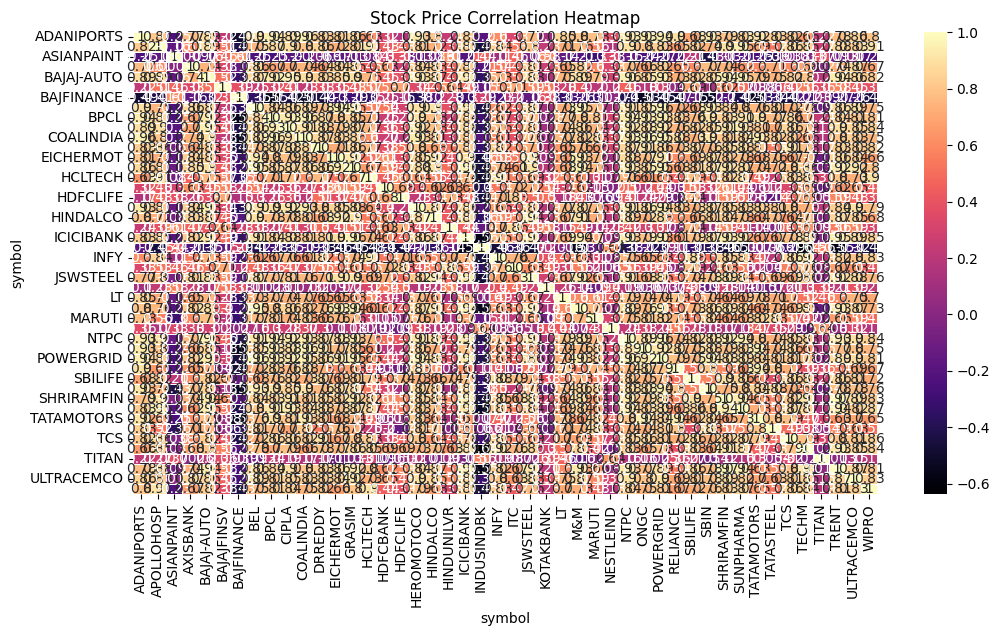

In [56]:
#heatmap

plt.figure(figsize=(12,6))
sns.heatmap(
    correlation,
    annot=True,
    cmap='magma',
    linewidths='0.5'
)
plt.title('Stock Price Correlation Heatmap')
plt.show()

In [ ]:
# 5. Top 5 Gainers and Losers (Month-wise)

In [63]:
combined_df['date'] = pd.to_datetime(combined_df['date'])
combined_df

close                date    high     low    month    open   volume  \
0      831.40 2023-10-03 05:30:00  836.75  824.25  2023-10  826.00  2453090   
1      824.60 2023-10-04 05:30:00  845.45  819.35  2023-10  830.95  4096647   
2      825.20 2023-10-05 05:30:00  832.00  820.25  2023-10  830.85  2083505   
3      830.75 2023-10-06 05:30:00  836.50  826.40  2023-10  830.00  1877058   
4      790.05 2023-10-09 05:30:00  818.80  785.00  2023-10  815.00  5994282   
...       ...                 ...     ...     ...      ...     ...      ...   
13059  566.70 2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760   
13060  552.85 2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882   
13061  562.00 2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889   
13062  557.15 2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304   
13063  571.65 2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616   

           symbol            company         sector  daily_returns  \
0      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS            NaN   
1      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.008179   
2      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.000728   
3      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.006726   
4      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.048992   
...           ...                ...            ...            ...   
13059       WIPRO              WIPRO       SOFTWARE      -0.004042   
13060       WIPRO              WIPRO       SOFTWARE      -0.024440   
13061       WIPRO              WIPRO       SOFTWARE       0.016551   
13062       WIPRO              WIPRO       SOFTWARE      -0.008630   
13063       WIPRO              WIPRO       SOFTWARE       0.026025   

       cumulative_return  
0                    NaN  
1              -0.008179  
2              -0.007457  
3              -0.000782  
4              -0.049735  
...                  ...  
13059           0.397706  
13060           0.363547  
13061           0.386114  
13062           0.374152  
13063           0.409915  

[13064 rows x 12 columns]

In [66]:
combined_df['month'] = combined_df['date'].dt.to_period('M')
combined_df['monthly return'] = combined_df.groupby(['symbol','month'])['close'].pct_change()*100
combined_df

close                date    high     low    month    open   volume  \
0      831.40 2023-10-03 05:30:00  836.75  824.25  2023-10  826.00  2453090   
1      824.60 2023-10-04 05:30:00  845.45  819.35  2023-10  830.95  4096647   
2      825.20 2023-10-05 05:30:00  832.00  820.25  2023-10  830.85  2083505   
3      830.75 2023-10-06 05:30:00  836.50  826.40  2023-10  830.00  1877058   
4      790.05 2023-10-09 05:30:00  818.80  785.00  2023-10  815.00  5994282   
...       ...                 ...     ...     ...      ...     ...      ...   
13059  566.70 2024-11-14 05:30:00  574.55  564.20  2024-11  568.95  4891760   
13060  552.85 2024-11-18 05:30:00  566.70  540.30  2024-11  566.70  7644882   
13061  562.00 2024-11-19 05:30:00  569.80  554.70  2024-11  556.00  6459889   
13062  557.15 2024-11-21 05:30:00  567.60  555.30  2024-11  562.00  5836304   
13063  571.65 2024-11-22 05:30:00  573.60  557.90  2024-11  561.95  7366616   

           symbol            company         sector  daily_returns  \
0      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS            NaN   
1      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.008179   
2      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.000728   
3      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS       0.006726   
4      ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.048992   
...           ...                ...            ...            ...   
13059       WIPRO              WIPRO       SOFTWARE      -0.004042   
13060       WIPRO              WIPRO       SOFTWARE      -0.024440   
13061       WIPRO              WIPRO       SOFTWARE       0.016551   
13062       WIPRO              WIPRO       SOFTWARE      -0.008630   
13063       WIPRO              WIPRO       SOFTWARE       0.026025   

       cumulative_return  monthly return  
0                    NaN             NaN  
1              -0.008179       -0.817898  
2              -0.007457        0.072763  
3              -0.000782        0.672564  
4              -0.049735       -4.899187  
...                  ...             ...  
13059           0.397706       -0.404218  
13060           0.363547       -2.443974  
13061           0.386114        1.655060  
13062           0.374152       -0.862989  
13063           0.409915        2.602531  

[13064 rows x 13 columns]

In [71]:
monthly_gainer = combined_df.sort_values(by=['month','monthly return'],ascending=[True,False])
monthly_gainer
top_5_gainer = monthly_gainer.groupby('month').head(5)
top_5_gainer

close                date     high      low    month     open  \
10241  1935.20 2023-10-27 05:30:00  2029.70  1851.00  2023-10  1851.00   
1148   5482.60 2023-10-19 05:30:00  5495.00  5245.00  2023-10  5300.00   
1423   1634.65 2023-10-06 05:30:00  1640.70  1551.05  2023-10  1559.35   
2845    303.25 2023-10-10 05:30:00   303.90   287.80  2023-10   288.25   
10800   667.10 2023-10-13 05:30:00   669.00   633.00  2023-10   633.95   
...        ...                 ...      ...      ...      ...      ...   
558    7424.85 2024-11-07 05:30:00  7483.90  7200.30  2024-11  7316.50   
3687   4883.70 2024-11-14 05:30:00  4973.00  4705.30  2024-11  4725.45   
2261    301.85 2024-11-06 05:30:00   304.30   287.20  2024-11   287.50   
7088    999.50 2024-11-05 05:30:00  1003.00   952.00  2024-11   954.90   
10223   816.05 2024-11-22 05:30:00   819.95   784.05  2024-11   786.00   

         volume      symbol             company         sector  daily_returns  \
10241   5011333  SHRIRAMFIN     SHRIRAM FINANCE        FINANCE       0.076547   
1148    2838352  BAJAJ-AUTO          BAJAJ AUTO    AUTOMOBILES       0.067204   
1423    7384628  BAJAJFINSV       BAJAJ FINSERV        FINANCE       0.059706   
2845   23283411   COALINDIA          COAL INDIA         MINING       0.053683   
10800  28011678  TATAMOTORS         TATA MOTORS    AUTOMOBILES       0.047335   
...         ...         ...                 ...            ...            ...   
558     2502817  APOLLOHOSP    APOLLO HOSPITALS  MISCELLANEOUS       0.065549   
3687    2874648   EICHERMOT       EICHER MOTORS    AUTOMOBILES       0.064288   
2261   52804364         BEL  BHARAT ELECTRONICS        DEFENCE       0.054130   
7088    5177028    JSWSTEEL           JSW STEEL          STEEL       0.046706   
10223  20665405        SBIN                 SBI        BANKING       0.045213   

       cumulative_return  monthly return  
10241           0.006894        7.654651  
1148            0.092924        6.720391  
1423            0.047148        5.970633  
2845            0.038883        5.368311  
10800           0.075187        4.733496  
...                  ...             ...  
558             0.450463        6.554871  
3687            0.457212        6.428836  
2261            1.168463        5.412956  
7088            0.297631        4.670646  
10223           0.353429        4.521294  

[70 rows x 13 columns]

In [76]:
monthly_losser = combined_df.sort_values(by=['month','monthly return'],ascending=[True,True])
monthly_losser
top_5_losser = monthly_losser.groupby('month').head(5)
top_5_losser

close                date     high      low    month     open  \
4       790.05 2023-10-09 05:30:00   818.80   785.00  2023-10   815.00   
853     995.55 2023-10-04 05:30:00  1037.00   988.85  2023-10  1035.35   
7684   1506.10 2023-10-26 05:30:00  1558.20  1500.00  2023-10  1554.00   
10225  1850.60 2023-10-04 05:30:00  1919.95  1841.50  2023-10  1909.00   
1720   7421.80 2023-10-26 05:30:00  7656.00  7401.20  2023-10  7625.10   
...        ...                 ...      ...      ...      ...      ...   
282    1114.65 2024-11-21 05:30:00  1160.70   995.65  2024-11  1160.70   
5386    648.10 2024-11-07 05:30:00   687.70   646.30  2024-11   682.00   
844    2543.10 2024-11-11 05:30:00  2598.75  2506.00  2024-11  2565.05   
12486  6505.50 2024-11-07 05:30:00  7015.25  6306.85  2024-11  6999.00   
5106   4519.60 2024-11-13 05:30:00  4696.75  4492.00  2024-11  4691.65   

         volume      symbol            company         sector  daily_returns  \
4       5994282  ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.048992   
853    22584212    AXISBANK          AXIS BANK        BANKING      -0.043706   
7684    3343802         M&M                M&M    AUTOMOBILES      -0.040150   
10225   1340167  SHRIRAMFIN    SHRIRAM FINANCE        FINANCE      -0.037124   
1720    1324630  BAJFINANCE      BAJAJ FINANCE        FINANCE      -0.035435   
...         ...         ...                ...            ...            ...   
282    46926687  ADANIPORTS  ADANI PORTS & SEZ  MISCELLANEOUS      -0.135696   
5386   26671445    HINDALCO           HINDALCO      ALUMINIUM      -0.084863   
844     8855022  ASIANPAINT       ASIAN PAINTS         PAINTS      -0.081731   
12486   4427899       TRENT              TRENT      RETAILING      -0.064690   
5106    1304908  HEROMOTOCO      HERO MOTOCORP    AUTOMOBILES      -0.043309   

       cumulative_return  monthly return  
4              -0.049735       -4.899187  
853            -0.043706       -4.370587  
7684           -0.020359       -4.015040  
10225          -0.037124       -3.712375  
1720           -0.068502       -3.543463  
...                  ...             ...  
282             0.340690      -13.569573  
5386            0.350349       -8.486303  
844            -0.196962       -8.173103  
12486           2.159390       -6.469028  
5106            0.498740       -4.330892  

[70 rows x 13 columns]

In [92]:
top_5_gainer.loc[:,'performance'] = 'gainer'
top_5_losser.loc[:,'performance'] = 'losser'

monthly_stock_update = pd.concat([top_5_gainer,top_5_losser],ignore_index=True)
monthly_stock_update
monthly_stock_update.to_csv("monthly_stock_update.csv",index=False)

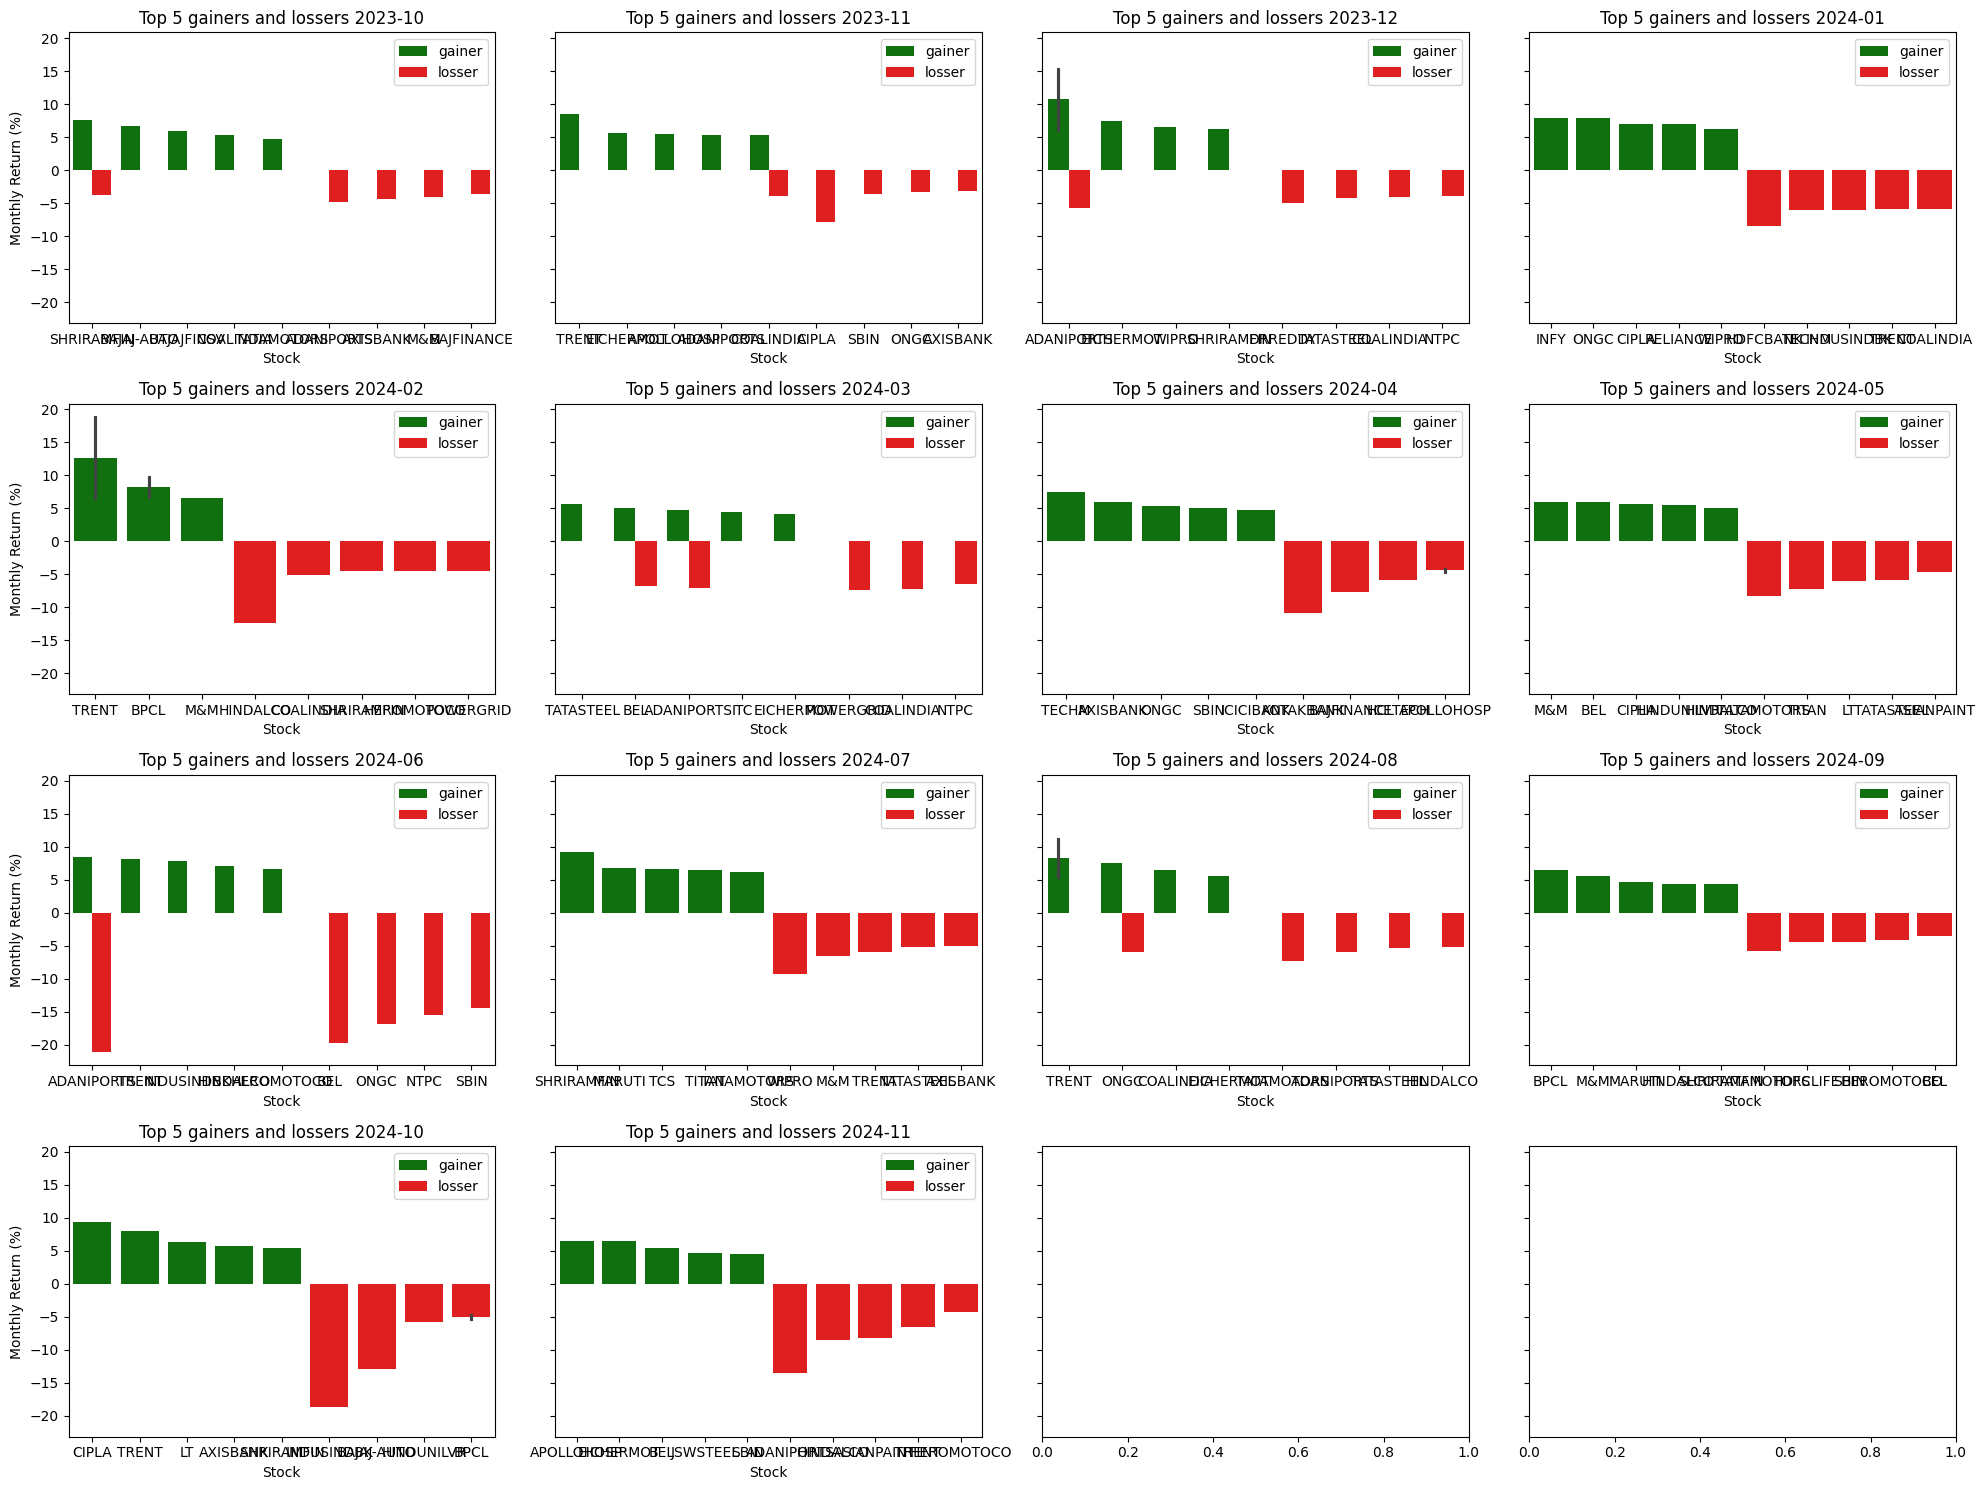

In [95]:
#12 subplots for each month 

datasetmonth = combined_df.sort_values('month')

months = combined_df['month'].unique()
fig,axes = plt.subplots(4,4,figsize = (20,15),sharey = True)
axes = axes.flatten()

for i , month in enumerate(months):
    ax = axes[i]
    data = monthly_stock_update[monthly_stock_update['month']==month]
    sns.barplot(
        data = data,
        x= 'symbol',
        y='monthly return',
        hue='performance',
        ax=ax,
        palette={'gainer':'green','losser':'red'}
    )
    ax.set_title(f'Top 5 gainers and lossers {month}')
    ax.set_ylabel('Monthly Return (%)')
    ax.set_xlabel('Stock')
    ax.legend(loc='best')

plt.tight_layout()
plt.show()

In [96]:
print(len(months))
print(datasetmonth)

14
       close                date     high      low    month     open   volume  \
11    798.60 2023-10-18 05:30:00   809.05   795.40  2023-10   808.95  2271927   
10    805.10 2023-10-17 05:30:00   814.40   804.00  2023-10   812.00  2162192   
3     830.75 2023-10-06 05:30:00   836.50   826.40  2023-10   830.00  1877058   
2     825.20 2023-10-05 05:30:00   832.00   820.25  2023-10   830.85  2083505   
1     824.60 2023-10-04 05:30:00   845.45   819.35  2023-10   830.95  4096647   
..       ...                 ...      ...      ...      ...      ...      ...   
274  1353.10 2024-11-07 05:30:00  1372.95  1350.00  2024-11  1372.95  1292794   
273  1370.00 2024-11-06 05:30:00  1382.00  1315.20  2024-11  1330.00  3645515   
272  1329.35 2024-11-05 05:30:00  1353.05  1295.90  2024-11  1350.00  4852958   
271  1349.25 2024-11-04 05:30:00  1395.00  1336.00  2024-11  1394.20  1700308   
270  1394.40 2024-11-01 05:30:00  1397.95  1378.40  2024-11  1386.50   243881   

         symbol         